In [ ]:
import random
import sys

!pip install deap
from moead import MOEAD

from deap import base
from deap import creator
from deap import tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

pd.set_option("display.max_columns", None)

tickers = [
    "ANTM.JK", "AUTO.JK", "AVIA.JK","BBCA.JK", "BBNI.JK", "BBRI.JK", "BMRI.JK",
    "BBTN.JK", "DSNG.JK", "EMTK.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INTP.JK",
    "JPFA.JK", "JSMR.JK", "KLBF.JK", "SCMA.JK", "SIDO.JK", "SMSM.JK", "SSMS.JK",
    "SMGR.JK", "TLKM.JK", "UNTR.JK", "UNVR.JK"
]

# ===== STEP 1: Download harga =====
price_data = yf.download(
    tickers,
    start="2022-01-01",
    end="2024-12-31",
    group_by="ticker",
    progress=False
)

def format_sig(x, sig=3):
    if pd.isna(x):
        return ""
    return f"{x:.{sig}g}"

# ===== STEP 2: Ambil Close price =====
close_data = price_data.loc[:, (slice(None), "Close")]
close_data.columns = close_data.columns.droplevel(1)

# ===== STEP 3: Hitung log return harian =====
returns = np.log(close_data / close_data.shift(1)).dropna(how="any")

/tmp/ipython-input-1535785416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(


In [ ]:
# ===== STEP 4: Statistik deskriptif =====
summary_stats = returns.describe().T  # .T biar per saham per baris

# Tambahan statistik penting (opsional tapi keren)
summary_stats["skewness"] = returns.skew()
summary_stats["kurtosis"] = returns.kurtosis()

print(summary_stats)

# ===== STEP 5: Simpan ke CSV =====
returns.to_csv(
    "log_return_harian_sri_kehati_2022_2024.csv",
    index=True
)
summary_stats_formatted = summary_stats.applymap(format_sig)

summary_stats_formatted.to_csv(
    "desc_stat_daily_returns_srikehati.csv",
    index=True
)

In [ ]:
simplereturns = close_data.pct_change().dropna(how="any")
simplereturns.to_csv(
    "simple_return_harian_sri_kehati_2022_2024.csv",
    index=True
)

In [ ]:
# ===== STEP 1: Ambil harga penutupan (Close) =====
close_prices = price_data.loc[:, (slice(None), "Close")]
close_prices.columns = close_prices.columns.droplevel(1)

# ===== STEP 2: Rapihin index tanggal =====
close_prices.index = pd.to_datetime(close_prices.index)

# ===== STEP 3: (opsional) urutkan tanggal =====
close_prices = close_prices.sort_index()

# ===== STEP 4: Simpan ke CSV =====
close_prices.to_csv("harga_saham_harian_sri_kehati.csv")

In [ ]:
import numpy as np
np.log(1.01023902)

np.float64(0.010186956320500406)

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import bds

# ===== STEP 1: Download harga =====
tickers = [
    "ANTM.JK", "AUTO.JK", "AVIA.JK","BBCA.JK", "BBNI.JK", "BBRI.JK", "BMRI.JK",
    "BBTN.JK", "DSNG.JK", "EMTK.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INTP.JK",
    "JPFA.JK", "JSMR.JK", "KLBF.JK", "SCMA.JK", "SIDO.JK", "SMSM.JK", "SSMS.JK",
    "SMGR.JK", "TLKM.JK", "UNTR.JK", "UNVR.JK"
]
price_data = yf.download(
    tickers,
    start="2022-01-01",
    end="2024-12-31",
    group_by="ticker",
    progress=False
)

# Ambil hanya harga penutupan (Close) untuk return
close_data = price_data.loc[:, (slice(None), "Close")]
close_data.columns = close_data.columns.droplevel(1)  # rapihin kolom
returns = np.log(close_data / close_data.shift(1)).dropna(how="any")


# Apply BDS test for each ticker
print("=== BDS Test Results ===")
for ticker in returns.columns:
    try:
        bds_stat, p_value = bds(returns[ticker])
        print(f"\nTicker: {ticker}")
        print(f"BDS Statistic: {bds_stat:.4f}")
        print(f"p-value: {p_value:.4f}")

        if p_value < 0.05:
            print("Return menunjukkan dependensi non-linear")
        else:
            print("Return cenderung linear / i.i.d")
    except ValueError as e:
        print(f"\nError for {ticker}: {e}")
        print(f"Skipping BDS test for {ticker} due to data issues.")



/tmp/ipython-input-784665283.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(


=== BDS Test Results ===

Ticker: JPFA.JK
BDS Statistic: 2.8320
p-value: 0.0046
Return menunjukkan dependensi non-linear

Ticker: ICBP.JK
BDS Statistic: 6.1579
p-value: 0.0000
Return menunjukkan dependensi non-linear

Ticker: AUTO.JK
BDS Statistic: 2.3816
p-value: 0.0172
Return menunjukkan dependensi non-linear

Ticker: BBCA.JK
BDS Statistic: 3.4371
p-value: 0.0006
Return menunjukkan dependensi non-linear

Ticker: UNVR.JK
BDS Statistic: 6.0427
p-value: 0.0000
Return menunjukkan dependensi non-linear

Ticker: BBRI.JK
BDS Statistic: 2.5550
p-value: 0.0106
Return menunjukkan dependensi non-linear

Ticker: BBNI.JK
BDS Statistic: 2.0112
p-value: 0.0443
Return menunjukkan dependensi non-linear

Ticker: INDF.JK
BDS Statistic: 3.2391
p-value: 0.0012
Return menunjukkan dependensi non-linear

Ticker: SMGR.JK
BDS Statistic: 0.8297
p-value: 0.4067
Return cenderung linear / i.i.d

Ticker: EMTK.JK
BDS Statistic: 3.8574
p-value: 0.0001
Return menunjukkan dependensi non-linear

Ticker: JSMR.JK
BDS Sta

/tmp/ipython-input-3872252073.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(


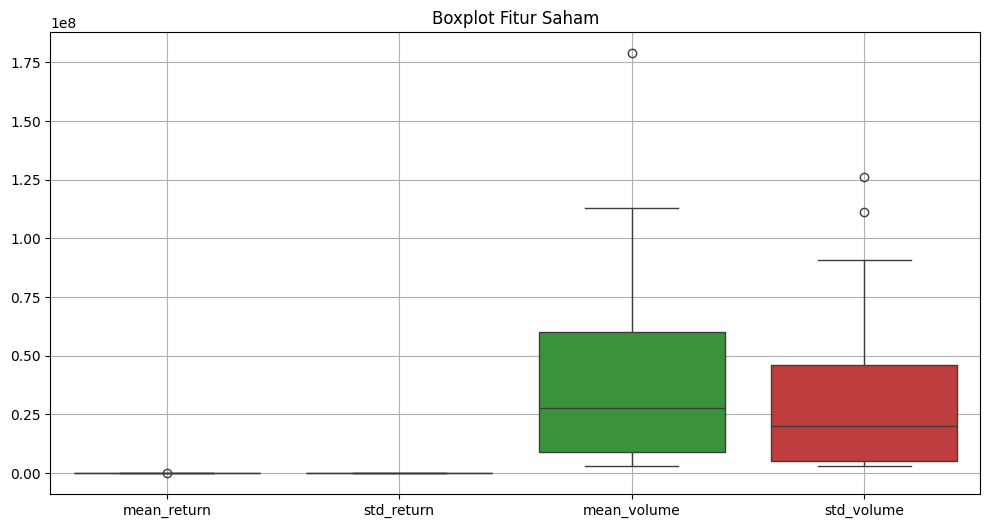


=== Analisis Distribusi (Skewness & Kurtosis) ===
mean_return     | Skewness = -0.669 | Kurtosis =  0.305
std_return      | Skewness =  0.592 | Kurtosis = -0.349
mean_volume     | Skewness =  1.442 | Kurtosis =  1.372
std_volume      | Skewness =  1.310 | Kurtosis =  0.693


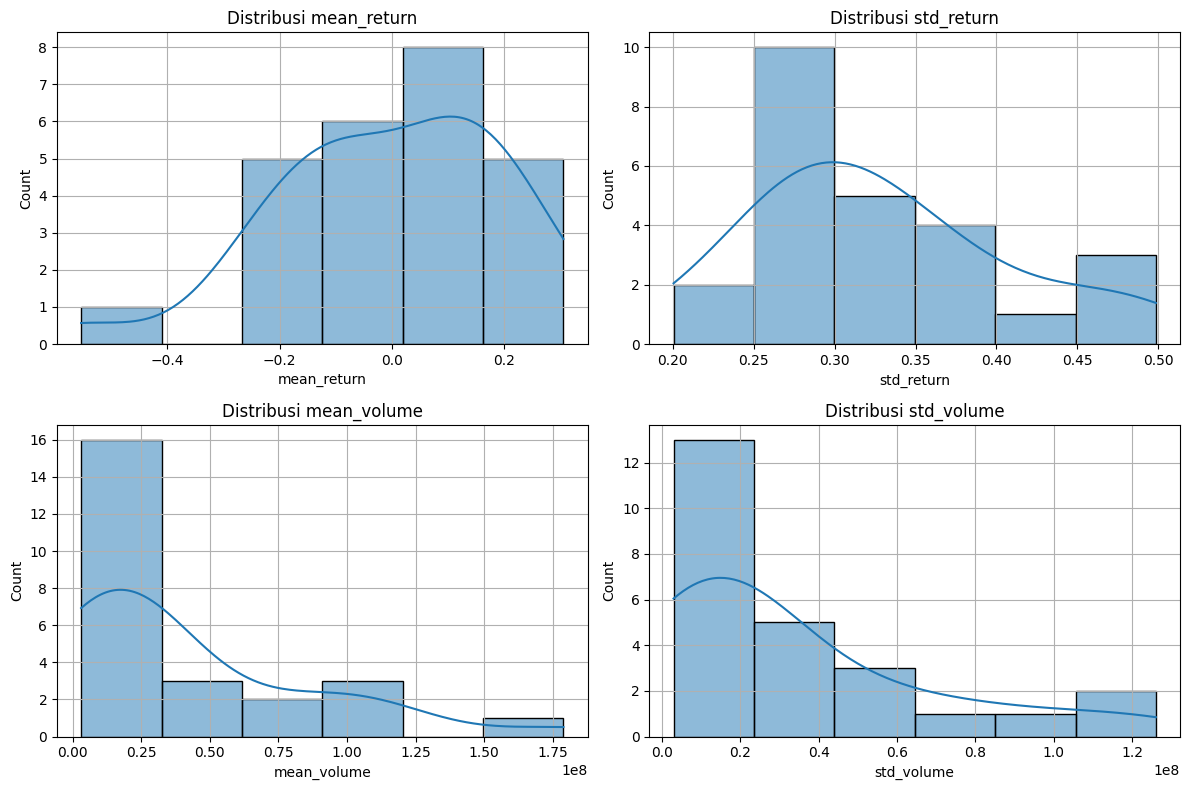

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# ===== STEP 1: Download harga =====
tickers = [
    "ANTM.JK", "AUTO.JK", "AVIA.JK","BBCA.JK", "BBNI.JK", "BBRI.JK", "BMRI.JK",
    "BBTN.JK", "DSNG.JK", "EMTK.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INTP.JK",
    "JPFA.JK", "JSMR.JK", "KLBF.JK", "SCMA.JK", "SIDO.JK", "SMSM.JK", "SSMS.JK",
    "SMGR.JK", "TLKM.JK", "UNTR.JK", "UNVR.JK"
]
price_data = yf.download(
    tickers,
    start="2022-01-01",
    end="2024-12-31",
    group_by="ticker",
    progress=False
)

# Ambil hanya harga penutupan (Close) untuk return
close_data = price_data.loc[:, (slice(None), "Close")]
close_data.columns = close_data.columns.droplevel(1)  # rapihin kolom
returns = np.log(close_data / close_data.shift(1)).dropna(how="any")

# ===== STEP 3: Hitung fitur per saham =====
features = pd.DataFrame(index=tickers)

# Mean return tahunan
features['mean_return'] = returns.mean() * 252

# Std dev return tahunan
features['std_return'] = returns.std() * np.sqrt(252)

# Mean volume per saham
mean_vol = {}
std_vol = {}
for ticker in tickers:
    mean_vol[ticker] = price_data[ticker]["Volume"].mean()
    std_vol[ticker] = price_data[ticker]["Volume"].std()

features['mean_volume'] = pd.Series(mean_vol)
features['std_volume'] = pd.Series(std_vol)

# Tambahkan kolom ticker sebagai kolom biasa
features['ticker'] = features.index

# ===== STEP 3.5: Analisis Outlier & Distribusi =====
plt.figure(figsize=(12, 6))
sns.boxplot(data=features[['mean_return', 'std_return', 'mean_volume', 'std_volume']])
plt.title('Boxplot Fitur Saham')
plt.grid(True)
plt.show()

# --- Tambahan: Cek Skewness & Kurtosis ---
print("\n=== Analisis Distribusi (Skewness & Kurtosis) ===")
dist_summary = {}
for col in ['mean_return', 'std_return', 'mean_volume', 'std_volume']:
    col_skew = skew(features[col].dropna())
    col_kurt = kurtosis(features[col].dropna())
    dist_summary[col] = {'Skewness': col_skew, 'Kurtosis': col_kurt}
    print(f"{col:15s} | Skewness = {col_skew: .3f} | Kurtosis = {col_kurt: .3f}")

dist_df = pd.DataFrame(dist_summary).T

# --- Opsional: Visualisasi distribusi tiap fitur ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
cols = ['mean_return', 'std_return', 'mean_volume', 'std_volume']

for i, ax in enumerate(axes.flat):
    sns.histplot(features[cols[i]], kde=True, ax=ax)
    ax.set_title(f"Distribusi {cols[i]}")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
np.mean(features['mean_return'])
np.std(features['mean_return'])

0.19754978193240866

In [ ]:
import pandas as pd

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

# Contoh cek untuk mean_return
outliers, lower, upper = detect_outliers_iqr(features['mean_return'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk std_return
outliers, lower, upper = detect_outliers_iqr(features['std_return'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk mean_volume
outliers, lower, upper = detect_outliers_iqr(features['mean_volume'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk std_volume
outliers, lower, upper = detect_outliers_iqr(features['std_volume'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

Batas bawah: -0.4506270736609702
Batas atas : 0.4743141811226944
Outliers:
 EMTK.JK   -0.554063
Name: mean_return, dtype: float64
Batas bawah: 0.12534210803796025
Batas atas : 0.5124829752727975
Outliers:
 Series([], Name: std_return, dtype: float64)
Batas bawah: -67044329.77839334
Batas atas : 136131386.56509694
Outliers:
 BBRI.JK    1.788972e+08
Name: mean_volume, dtype: float64
Batas bawah: -56545363.084904574
Batas atas : 107772998.70857781
Outliers:
 BBRI.JK    1.111358e+08
SCMA.JK    1.261059e+08
Name: std_volume, dtype: float64


In [ ]:
import pandas as pd

# Ambil mean return antar saham
mean_return = features['mean_return'].copy()

# ===== STEP 1: Urutkan data =====
mean_return_sorted = mean_return.sort_values()

print("=== Data Mean Return (Urut Kecil → Besar) ===")
print(mean_return_sorted)

# ===== STEP 2: Tentukan jumlah observasi =====
n = len(mean_return_sorted)
print("\nJumlah saham (n):", n)

# ===== STEP 3: Hitung posisi Q1 dan Q3 =====
# Menggunakan definisi kuartil empiris
Q1 = mean_return_sorted.quantile(0.25)
Q3 = mean_return_sorted.quantile(0.75)

print("\nQ1 (25%):", Q1)
print("Q3 (75%):", Q3)

# ===== STEP 4: Hitung IQR =====
IQR = Q3 - Q1
print("\nIQR =", IQR)

# ===== STEP 5: Hitung batas bawah & atas =====
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBatas bawah (Lower Bound):", lower_bound)
print("Batas atas  (Upper Bound):", upper_bound)

# ===== STEP 6: Identifikasi outlier =====
outliers = mean_return_sorted[
    (mean_return_sorted < lower_bound) |
    (mean_return_sorted > upper_bound)
]

print("\n=== Saham yang terdeteksi sebagai Outlier ===")
print(outliers)

=== Data Mean Return (Urut Kecil → Besar) ===
EMTK.JK   -0.554063
AVIA.JK   -0.255482
SMGR.JK   -0.245002
UNVR.JK   -0.242828
SCMA.JK   -0.191279
INTP.JK   -0.131870
TLKM.JK   -0.103774
ANTM.JK   -0.101933
INCO.JK   -0.091049
BBTN.JK   -0.088433
SIDO.JK   -0.082578
KLBF.JK   -0.040205
JSMR.JK    0.039758
BBRI.JK    0.056047
JPFA.JK    0.086420
INDF.JK    0.114951
ICBP.JK    0.117875
BBCA.JK    0.122214
BBNI.JK    0.127461
SSMS.JK    0.150868
SMSM.JK    0.181971
UNTR.JK    0.210069
BMRI.JK    0.219082
DSNG.JK    0.270075
AUTO.JK    0.306466
Name: mean_return, dtype: float64

Jumlah saham (n): 25

Q1 (25%): -0.10377410311709598
Q3 (75%): 0.12746121057882018

IQR = 0.23123531369591616

Batas bawah (Lower Bound): -0.4506270736609702
Batas atas  (Upper Bound): 0.4743141811226944

=== Saham yang terdeteksi sebagai Outlier ===
EMTK.JK   -0.554063
Name: mean_return, dtype: float64


In [ ]:
import pandas as pd

# Ambil statistik return & volume
summary_stats = features[[
    'mean_return',
    'std_return',
    'mean_volume',
    'std_volume'
]].copy()

summary_stats.to_csv("summary_return_volume.csv")


=== Analisis Distribusi (Skewness & Kurtosis) ===
mean_return     | Skewness = -0.385 | Kurtosis = -0.525
std_return      | Skewness =  0.592 | Kurtosis = -0.349
mean_volume     | Skewness =  1.063 | Kurtosis = -0.252
std_volume      | Skewness =  1.148 | Kurtosis =  0.115


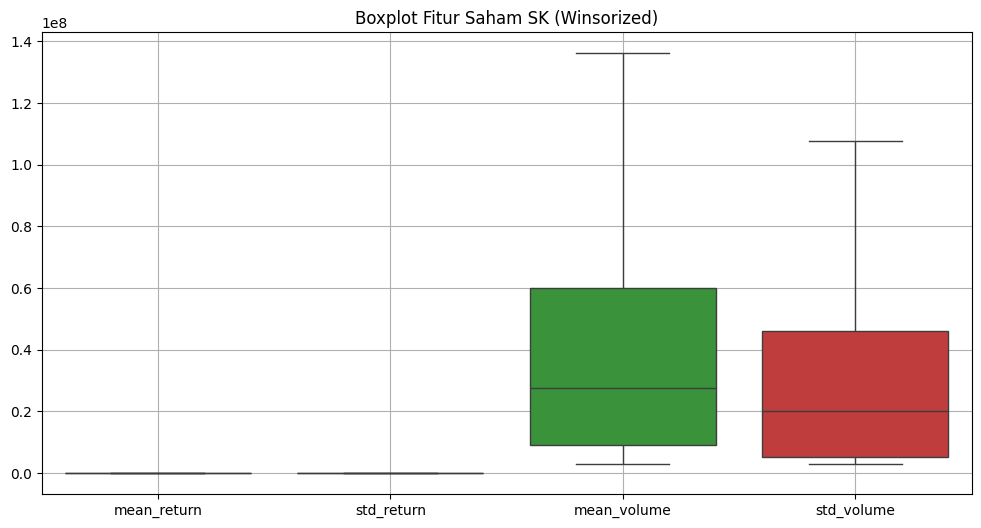

In [ ]:
def winsorize_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower=lower, upper=upper)

# Terapkan ke tiap fitur
features['mean_return'] = winsorize_iqr(features['mean_return'])
features['mean_volume'] = winsorize_iqr(features['mean_volume'])
features['std_return'] = winsorize_iqr(features['std_return'])
features['std_volume'] = winsorize_iqr(features['std_volume'])

print("\n=== Analisis Distribusi (Skewness & Kurtosis) ===")
dist_summary = {}
for col in ['mean_return', 'std_return', 'mean_volume', 'std_volume']:
    col_skew = skew(features[col].dropna())
    col_kurt = kurtosis(features[col].dropna())
    dist_summary[col] = {'Skewness': col_skew, 'Kurtosis': col_kurt}
    print(f"{col:15s} | Skewness = {col_skew: .3f} | Kurtosis = {col_kurt: .3f}")

# Visualisasi ulang
plt.figure(figsize=(12, 6))
sns.boxplot(data=features[['mean_return', 'std_return', 'mean_volume', 'std_volume']])
plt.title('Boxplot Fitur Saham SK (Winsorized)')
plt.grid(True)
plt.show()

In [ ]:
np.mean(features['mean_return'])


np.float64(-0.0008721365628971911)

In [ ]:
data= [-0.45062, -0.255482,  -0.245002,-0.242828,-0.191279,-0.131870,
       -0.103774, -0.101933, -0.091049, -0.088433, -0.082578, -0.040205,
       0.039758, 0.056047, 0.086420, 0.114951, 0.117875, 0.122214, 0.127461,
       0.150868, 0.181971, 0.210069, 0.219082, 0.270075, 0.306466]
mean_np = np.mean(data)
std_np = np.std(data)
print(f"Mean dengan NumPy: {mean_np}")
print(f"Std dengan NumPy: {std_np}")

Mean dengan NumPy: -0.0008718399999999927
Std dengan NumPy: 0.1867970113293422


In [ ]:
-0.101933

-0.005009559999999993

In [ ]:
# Contoh cek untuk mean_return
outliers, lower, upper = detect_outliers_iqr(features['mean_return'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk std_return
outliers, lower, upper = detect_outliers_iqr(features['std_return'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk mean_volume
outliers, lower, upper = detect_outliers_iqr(features['mean_volume'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

# Contoh cek untuk std_volume
outliers, lower, upper = detect_outliers_iqr(features['std_volume'])
print("Batas bawah:", lower)
print("Batas atas :", upper)
print("Outliers:\n", outliers)

Batas bawah: -0.4506270736609722
Batas atas : 0.47431418112269585
Outliers:
 Series([], Name: mean_return, dtype: float64)
Batas bawah: 0.12534200518291153
Batas atas : 0.512483194834152
Outliers:
 Series([], Name: std_return, dtype: float64)
Batas bawah: -67044329.77839334
Batas atas : 136131386.56509694
Outliers:
 Series([], Name: mean_volume, dtype: float64)
Batas bawah: -56545363.084904574
Batas atas : 107772998.70857781
Outliers:
 Series([], Name: std_volume, dtype: float64)


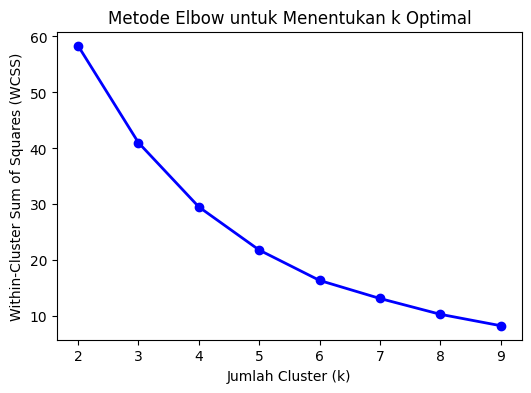

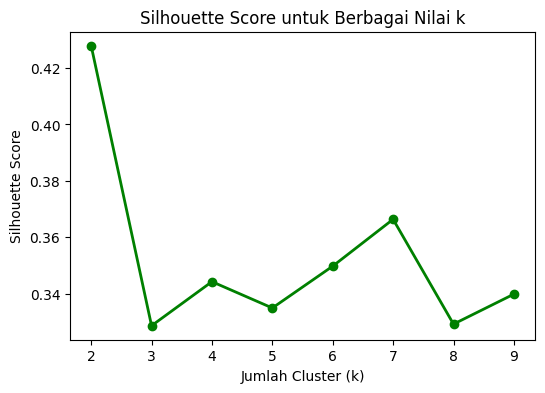

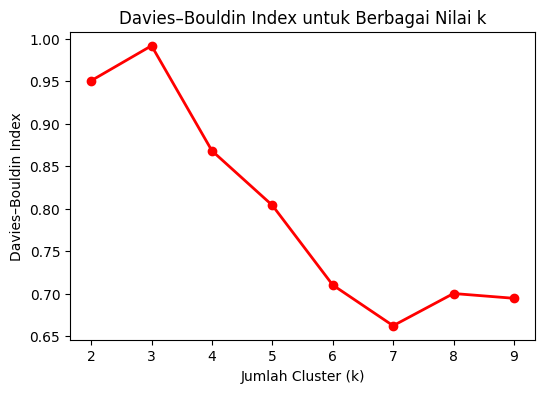

In [ ]:
# === Import library tambahan ===
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===== STEP 4: Standardisasi data fitur =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features[['mean_return', 'std_return', 'mean_volume', 'std_volume']])

# ===== STEP 5: Menentukan jumlah cluster optimal =====
wcss = []               # untuk Elbow (inertia)
silhouette_scores = []  # untuk Silhouette
dbi_scores = []         # untuk Davies–Bouldin Index

K = range(2, 10)  # rentang jumlah cluster yang diuji

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))

# ===== Visualisasi Elbow Method =====
plt.figure(figsize=(6,4))
plt.plot(K, wcss, 'bo-', linewidth=2)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

# ===== Visualisasi Silhouette Coefficient =====
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, 'go-', linewidth=2)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Nilai k')
plt.show()

# ===== Visualisasi Davies–Bouldin Index =====
plt.figure(figsize=(6,4))
plt.plot(K, dbi_scores, 'ro-', linewidth=2)
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies–Bouldin Index')
plt.title('Davies–Bouldin Index untuk Berbagai Nilai k')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ===== STEP 4: Standardisasi data fitur =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(
    features[['mean_return', 'std_return', 'mean_volume', 'std_volume']]
)

# ===== STEP 4.1: Kembalikan ke DataFrame =====
features_scaled = pd.DataFrame(
    X_scaled,
    columns=['mean_return_z', 'std_return_z', 'mean_volume_z', 'std_volume_z'],
    index=features.index   # biar tickernya tetap
)

# ===== STEP 4.2: Simpan ke CSV =====
features_scaled.to_csv(
    "features_standardized_srikehati.csv",
    index=True
)

print("Data hasil standardisasi berhasil disimpan.")

Data hasil standardisasi berhasil disimpan.


In [ ]:
import pandas as pd
import numpy as np

elbow_table = pd.DataFrame({
    "k": list(K),
    "WCSS": wcss
})

# Penurunan absolut
elbow_table["Delta_WCSS"] = elbow_table["WCSS"].diff().abs()

# Penurunan relatif (%)
elbow_table["Delta_WCSS_%"] = elbow_table["Delta_WCSS"] / elbow_table["WCSS"].shift(1) * 100

print(elbow_table)


   k       WCSS  Delta_WCSS  Delta_WCSS_%
0  2  58.346983         NaN           NaN
1  3  41.032368   17.314614     29.675252
2  4  29.550525   11.481844     27.982405
3  5  21.840537    7.709988     26.090866
4  6  16.415052    5.425485     24.841354
5  7  13.187342    3.227710     19.663110
6  8  10.361435    2.825907     21.428935
7  9   8.322714    2.038722     19.676054


In [ ]:
# ===== Pilih k optimal (misal dari hasil visualisasi) =====
k_optimal = 3  # misal dari hasil Elbow dan Silhouette
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
features['cluster'] = kmeans_final.fit_predict(X_scaled)

# ===== Ringkasan cluster =====
cluster_summary = features.groupby('cluster')[['mean_return','std_return','mean_volume','std_volume']].mean()
print("Ringkasan tiap cluster:")
print(cluster_summary)

# ===== Anggota masing-masing cluster =====
cluster_members = features.groupby("cluster")["ticker"].apply(list).to_dict()
print("\nAnggota tiap cluster:")
for c, members in cluster_members.items():
    print(f"Cluster {c}: {members}")

Ringkasan tiap cluster:
         mean_return  std_return   mean_volume    std_volume
cluster                                                     
0          -0.180897    0.342484  2.400659e+07  2.467784e+07
1           0.000059    0.305618  1.057749e+08  8.412040e+07
2           0.160591    0.328068  1.545991e+07  9.024009e+06

Anggota tiap cluster:
Cluster 0: ['AVIA.JK', 'BBTN.JK', 'EMTK.JK', 'INCO.JK', 'INTP.JK', 'KLBF.JK', 'SIDO.JK', 'SMGR.JK', 'UNVR.JK']
Cluster 1: ['ANTM.JK', 'BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'SCMA.JK', 'TLKM.JK']
Cluster 2: ['AUTO.JK', 'BBNI.JK', 'DSNG.JK', 'ICBP.JK', 'INDF.JK', 'JPFA.JK', 'JSMR.JK', 'SMSM.JK', 'SSMS.JK', 'UNTR.JK']


In [ ]:
centroids_scaled = kmeans_final.cluster_centers_
centroids_scaled_df = pd.DataFrame(
    centroids_scaled,
    columns=['mean_return_z', 'std_return_z', 'mean_volume_z', 'std_volume_z']
)

print(centroids_scaled_df)

   mean_return_z  std_return_z  mean_volume_z  std_volume_z
0      -0.963743      0.188164      -0.404184     -0.247043
1       0.004987     -0.286499       1.635182      1.587489
2       0.864377      0.002552      -0.617344     -0.730155


In [ ]:
from scipy.spatial.distance import cdist

distances = cdist(
    X_scaled,
    kmeans_final.cluster_centers_,
    metric='euclidean'
)

distances_df = pd.DataFrame(
    distances,
    index=features.index,  # Fixed: Use features.index instead of X_scaled.index
    columns=[f'distance_to_cluster_{i}' for i in range(k_optimal)]
)

print(distances_df)
# ===== STEP 4.2: Simpan ke CSV =====
distances_df.to_csv(
    "distances_df_srikehati.csv",
    index=True
)

         distance_to_cluster_0  distance_to_cluster_1  distance_to_cluster_2
ANTM.JK               2.627950               1.295135               3.439728
AUTO.JK               2.738300               3.945954               0.971803
AVIA.JK               0.543989               2.916322               2.410292
BBCA.JK               2.966744               1.697835               2.741964
BBNI.JK               2.143824               2.138019               1.569766
BBRI.JK               4.163405               1.286554               4.426486
BMRI.JK               3.287187               1.419525               2.876547
BBTN.JK               0.806635               2.744623               1.506805
DSNG.JK               2.689166               3.565475               1.495362
EMTK.JK               2.591868               4.008096               4.148202
ICBP.JK               2.072085               3.590960               0.959745
INCO.JK               0.867636               3.222089               1.641101

In [ ]:
tickers = ['AVIA.JK', 'BBTN.JK', 'EMTK.JK', 'INCO.JK', 'INTP.JK', 'KLBF.JK', 'SIDO.JK', 'SMGR.JK', 'UNVR.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)
weights= np.array(['0.0090', '0.2309', '0.0296', '0.2086', '0.0189', '0.2836', '0.1928', '0.0180', '0.0087'], dtype=float)
daily = np.dot(R, weights)

# Hitung return portofolio harian
portfolio_daily_return = np.dot(R, weights)

# Jadikan DataFrame
df_portfolio_return = pd.DataFrame({
    "date": log_returns.index,
    "portfolio_log_return": portfolio_daily_return
})

# Simpan ke CSV
df_portfolio_return.to_csv("portfolio_daily_return.csv", index=False)

In [ ]:
# 1. Return portofolio harian
daily = np.dot(R, weights)

# 2. Urutkan return dari terendah
daily_sorted = np.sort(daily)

# 3. Tentukan jumlah observasi tail
alpha = 0.95
tail_size = int((1 - alpha) * len(daily_sorted))  # ≈ 36

# 4. Ambil tail loss
tail_losses = daily_sorted[:tail_size]
print(f"Urutan: {tail_losses}")

# 5. Hitung CVaR
cvar_manual = np.mean(tail_losses)
print(f"CVaR asli: {cvar_manual}")

# Konversi ke risk positif
cvar_pos = -cvar_manual
print(f"CVaR modif: {cvar_pos}")

Urutan: [-0.04322284 -0.03979597 -0.03657639 -0.03364804 -0.03055275 -0.02893329
 -0.02790017 -0.02644717 -0.02625829 -0.02593606 -0.02431242 -0.02347645
 -0.02305389 -0.0227747  -0.02238414 -0.02201777 -0.02178958 -0.02168005
 -0.02143683 -0.02112593 -0.02074227 -0.01993746 -0.01982087 -0.01948331
 -0.0192776  -0.01922506 -0.01921452 -0.01901446 -0.01900355 -0.01847912
 -0.01841308 -0.0181857  -0.01802692 -0.01801862 -0.01796752 -0.01779036]
CVaR asli: -0.02349786496989214
CVaR modif: 0.02349786496989214


In [ ]:
weights= np.array(['0.0090', '0.2309', '0.0296', '0.2086', '0.0189', '0.2836', '0.1928', '0.0180', '0.0087'], dtype=float)
daily = np.dot(R, weights)
rf_rate = 0.06
rf_daily = rf_rate / 252

# Excess return
excess = daily - rf_daily

downside = excess[excess < 0]
downside_mean = np.mean(downside)
downside_dev = np.std(downside, ddof=0)
sortino_manual = np.mean(excess) / downside_dev * np.sqrt(252)

print(f"sortino_manual: {sortino_manual}")
print(f"np.mean(excess): {np.mean(excess)}")
print(f"downside dev {downside_dev}")
print(f"downside mean {downside_mean}")

sortino_manual: -1.4119885125084481
np.mean(excess): -0.0006128959074091598
downside dev 0.006890580778280394
downside mean -0.008126429013472741


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
# ========= CONFIG Cluster 1 =========
tickers = ['AVIA.JK', 'BBTN.JK', 'EMTK.JK', 'INCO.JK', 'INTP.JK', 'KLBF.JK', 'SIDO.JK', 'SMGR.JK', 'UNVR.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"

NGEN = 50      # Generations
MU = 50        # Population size
LAMBDA = 2     # Neighborhood solutions (MOEA/D)
CXPB = 0.7     # Crossover probability
MUTPB = 0.2    # Mutation probability
RF_RATE = 0.06 # Risk-free annual rate

# ========= DATA =========
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)

# ========= METRIC FUNCTIONS =========
def portfolio_return(weights):
    """Annualized expected return (log returns aggregated)"""
    daily = np.dot(R, weights)
    return np.mean(daily) * 252

def portfolio_cvar(weights, alpha=0.95):
    """Conditional Value-at-Risk (expected shortfall) on daily returns"""
    daily = np.dot(R, weights)
    q = np.percentile(daily, 100*(1-alpha))
    tail = daily[daily <= q]
    if len(tail) == 0:
        return np.nan
    return np.mean(tail)  # negative if losses; we'll convert sign later

def portfolio_sortino(weights, rf_rate=RF_RATE):
    """Sortino ratio annualized"""
    daily = np.dot(R, weights)
    rf_daily = rf_rate / 252.0
    excess = daily - rf_daily
    downside = excess[excess < 0]
    if len(downside) == 0:
        return np.nan
    dd = np.std(downside, ddof=0)
    if dd == 0:
        return np.nan
    sortino = np.mean(excess) / dd
    return sortino * np.sqrt(252.0)

# ========= NORMALIZE WEIGHTS =========
def normalize_weights_inplace(individual, long_only=True):
    """Clip negatives and normalize so sum = 1. Modifies individual in-place."""
    w = np.array(individual, dtype=float)
    if long_only:
        w = np.clip(w, 0.0, None)
    s = w.sum()
    if s <= 0 or np.isnan(s):
        w = np.ones_like(w) / len(w)
    else:
        w = w / s
    # Write back into individual (DEAP object)
    individual[:] = [float(x) for x in w]
    return individual

# ========= EVALUATION =========
def evalPortfolio(individual):
    # ensure valid weights
    normalize_weights_inplace(individual, long_only=True)
    w = np.array(individual, dtype=float)

    ret = portfolio_return(w)                # annualized expected return
    cvar = portfolio_cvar(w, alpha=0.95)     # negative value typical for losses
    sortino = portfolio_sortino(w)

    # handle invalid/nan metrics by large penalty or sentinel
    if np.isnan(cvar):
        cvar = 1e3   # large bad risk
    # For return/sortino: if nan, penalize heavily
    if np.isnan(sortino):
        sortino = -1e3
    if np.isnan(ret):
        ret = -1e3

    # DEAP expects minimization for each objective according to creator weights:
    # We want: maximize return, minimize CVaR, maximize sortino.
    # So return (-return, CVaR_positive, -sortino) so all are minimized.
    # Note: convert CVaR to positive risk number by negating mean tail if needed.
    # portfolio_cvar returns mean tail (usually negative for losses). We want positive number to minimize:
    cvar_pos = -cvar   # if cvar is negative (loss), -cvar is positive risk value
    return float(-ret), float(cvar_pos), float(-sortino)

# ========= OPERATORS =========
def generate_normalized_individual():
    vec = np.random.rand(N_ASSETS)
    vec = vec / np.sum(vec)
    return creator.Individual(vec.tolist())

def cxBlend_normalize(ind1, ind2, alpha=0.5):
    # perform blend then normalize children in-place
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        x = (1. - gamma) * ind1[i] + gamma * ind2[i]
        y = gamma * ind1[i] + (1. - gamma) * ind2[i]
        ind1[i], ind2[i] = x, y
    # normalize both children
    normalize_weights_inplace(ind1, long_only=True)
    normalize_weights_inplace(ind2, long_only=True)
    return ind1, ind2

def mutGaussian_normalize(individual, mu=0, sigma=0.05, indpb=0.2):
    # gaussian mutation, then normalize
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    normalize_weights_inplace(individual, long_only=True)
    return individual,

# ========= MAIN =========
def main(seed=42):
    random.seed(seed)
    np.random.seed(seed)

    # DEAP creator (safe)
    try:
        # all objectives will be minimized (we invert return & sortino inside eval)
        creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0, -1.0))
    except Exception:
        pass
    try:
        creator.create("Individual", list, fitness=creator.Fitness)
    except Exception:
        pass

    toolbox = base.Toolbox()
    toolbox.register("individual", generate_normalized_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalPortfolio)
    toolbox.register("mate", cxBlend_normalize)
    toolbox.register("mutate", mutGaussian_normalize)
    toolbox.register("select", tools.selNSGA2)

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    # Multi statistics like knapsack example
    fitness_tags = ["Return", "CVaR", "Sortino"]
    stats = {}
    def lambda_factory(idx):
        return lambda ind: ind.fitness.values[idx]
    for tag in fitness_tags:
        s = tools.Statistics(key=lambda ind, idx=fitness_tags.index(tag): ind.fitness.values[idx])
        stats[tag] = s

    mstats = tools.MultiStatistics(**stats)
    mstats.register("avg", np.mean, axis=0)
    mstats.register("std", np.std, axis=0)
    mstats.register("min", np.min, axis=0)
    mstats.register("max", np.max, axis=0)

    # instantiate MOEAD (uses moead.py you provided)
    ea = MOEAD(pop, toolbox, MU, CXPB, MUTPB, ngen=NGEN, stats=mstats, halloffame=hof, nr=LAMBDA)
    pop = ea.execute()

    return pop, mstats, hof

# ========= RUN =========
if __name__ == "__main__":
    pop, stats, hof = main(seed=64)

    # Build dataframe for Pareto front: compute actual metrics (not inverted)
    rows = []
    for ind in hof:
        # ensure normalized before reporting
        normalize_weights_inplace(ind, long_only=True)
        w = np.array(ind, dtype=float)
        ann_ret = portfolio_return(w)
        cvar = portfolio_cvar(w, alpha=0.95)  # mean tail (negative if losses)
        cvar_pos = -cvar
        sortino = portfolio_sortino(w)
        rows.append({
            "weights": w,
            "Return": ann_ret,
            "CVaR_pos": cvar_pos,   # positive risk
            "Sortino": sortino
        })

    df_pf = pd.DataFrame(rows)
    # Expand weights into columns for readability
    w_df = pd.DataFrame(df_pf["weights"].tolist(), columns=[f"w_{t}" for t in tickers])
    df_pf = pd.concat([w_df, df_pf.drop(columns=["weights"])], axis=1)

    # Drop rows with NaN in Sortino (penalized earlier, but show)
    # Ranking: higher return better, lower CVaR better, higher Sortino better
    # Convert each metric to percent-rank (0..1), then composite score
    df_pf["r_return"] = df_pf["Return"].rank(pct=True)
    df_pf["r_cvar"] = 1.0 - df_pf["CVaR_pos"].rank(pct=True)   # invert: lower CVaR => higher rank
    df_pf["r_sortino"] = df_pf["Sortino"].rank(pct=True)

    # Composite score (tweak weights as you like)
    w_ret, w_cvar, w_sort = 0.4, 0.3, 0.3
    df_pf["composite"] = w_ret * df_pf["r_return"] + w_cvar * df_pf["r_cvar"] + w_sort * df_pf["r_sortino"]

    # Select best
    best_idx = df_pf["composite"].idxmax()
    best_row = df_pf.loc[best_idx]

    # Print summary
    pd.set_option("display.float_format", lambda x: f"{x:.4f}")
    print("\n=== PARETO FRONT (table) ===")
    print(df_pf.reset_index(drop=True)[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]].to_string(index=False))

    print("\n=== BEST (by composite score) ===")
    print(best_row[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]])

    # Also show best normalized weights and metrics
    print("\nBest weights (normalized):")
    print(np.round(best_row[[f"w_{t}" for t in tickers]].values.astype(float), 4))

Executing MOEA/D
POPSIZE:
   	     	                                   CVaR                                   	                                  Return                                 	                    Sortino                     
   	     	--------------------------------------------------------------------------	-------------------------------------------------------------------------	------------------------------------------------
gen	evals	avg      	evals	gen	max      	min      	std       	avg     	evals	gen	max     	min      	std      	avg    	evals	gen	max    	min    	std     
50 	3    	0.0242345	3    	50 	0.0271896	0.0212871	0.00134926	0.197015	3    	50 	0.274422	0.0944523	0.0342092	2.31771	3    	50 	2.69452	1.41207	0.236115
50 	5    	0.0240782	5    	50 	0.0271896	0.0212871	0.00128996	0.193945	5    	50 	0.250453	0.0944523	0.0319456	2.30611	5    	50 	2.64616	1.41207	0.232491
50 	7    	0.0240904	7    	50 	0.0271896	0.0212871	0.00128607	0.19282 	7    	50 	0.250453	0.0944523	0.0

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
# ========= CONFIG Cluster 1 =========
tickers = ['AVIA.JK', 'BBTN.JK', 'EMTK.JK', 'INCO.JK', 'INTP.JK', 'KLBF.JK', 'SIDO.JK', 'SMGR.JK', 'UNVR.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"

NGEN = 500      # Generations
MU = 300        # Population size
LAMBDA = 20     # Neighborhood solutions (MOEA/D)
CXPB = 1     # Crossover probability
MUTPB = 0.04    # Mutation probability
RF_RATE = 0.06 # Risk-free annual rate

# ========= DATA =========
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)

# ========= METRIC FUNCTIONS =========
def portfolio_return(weights):
    """Annualized expected return (log returns aggregated)"""
    daily = np.dot(R, weights)
    return np.mean(daily) * 252

def portfolio_cvar(weights, alpha=0.95):
    """Conditional Value-at-Risk (expected shortfall) on daily returns"""
    daily = np.dot(R, weights)
    q = np.percentile(daily, 100*(1-alpha))
    tail = daily[daily <= q]
    if len(tail) == 0:
        return np.nan
    return np.mean(tail)  # negative if losses; we'll convert sign later

def portfolio_sortino(weights, rf_rate=RF_RATE):
    """Sortino ratio annualized"""
    daily = np.dot(R, weights)
    rf_daily = rf_rate / 252.0
    excess = daily - rf_daily
    downside = excess[excess < 0]
    if len(downside) == 0:
        return np.nan
    dd = np.std(downside, ddof=0)
    if dd == 0:
        return np.nan
    sortino = np.mean(excess) / dd
    return sortino * np.sqrt(252.0)

# ========= NORMALIZE WEIGHTS =========
def normalize_weights_inplace(individual, long_only=True):
    """Clip negatives and normalize so sum = 1. Modifies individual in-place."""
    w = np.array(individual, dtype=float)
    if long_only:
        w = np.clip(w, 0.0, None)
    s = w.sum()
    if s <= 0 or np.isnan(s):
        w = np.ones_like(w) / len(w)
    else:
        w = w / s
    # Write back into individual (DEAP object)
    individual[:] = [float(x) for x in w]
    return individual

# ========= EVALUATION =========
def evalPortfolio(individual):
    # ensure valid weights
    normalize_weights_inplace(individual, long_only=True)
    w = np.array(individual, dtype=float)

    ret = portfolio_return(w)                # annualized expected return
    cvar = portfolio_cvar(w, alpha=0.95)     # negative value typical for losses
    sortino = portfolio_sortino(w)

    # handle invalid/nan metrics by large penalty or sentinel
    if np.isnan(cvar):
        cvar = 1e3   # large bad risk
    # For return/sortino: if nan, penalize heavily
    if np.isnan(sortino):
        sortino = -1e3
    if np.isnan(ret):
        ret = -1e3

    # DEAP expects minimization for each objective according to creator weights:
    # We want: maximize return, minimize CVaR, maximize sortino.
    # So return (-return, CVaR_positive, -sortino) so all are minimized.
    # Note: convert CVaR to positive risk number by negating mean tail if needed.
    # portfolio_cvar returns mean tail (usually negative for losses). We want positive number to minimize:
    cvar_pos = -cvar   # if cvar is negative (loss), -cvar is positive risk value
    return float(-ret), float(cvar_pos), float(-sortino)

# ========= OPERATORS =========
def generate_normalized_individual():
    vec = np.random.rand(N_ASSETS)
    vec = vec / np.sum(vec)
    return creator.Individual(vec.tolist())

def cxBlend_normalize(ind1, ind2, alpha=0.5):
    # perform blend then normalize children in-place
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        x = (1. - gamma) * ind1[i] + gamma * ind2[i]
        y = gamma * ind1[i] + (1. - gamma) * ind2[i]
        ind1[i], ind2[i] = x, y
    # normalize both children
    normalize_weights_inplace(ind1, long_only=True)
    normalize_weights_inplace(ind2, long_only=True)
    return ind1, ind2

def mutGaussian_normalize(individual, mu=0, sigma=0.05, indpb=0.2):
    # gaussian mutation, then normalize
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    normalize_weights_inplace(individual, long_only=True)
    return individual,

# ========= MAIN =========
def main(seed=42):
    random.seed(seed)
    np.random.seed(seed)

    # DEAP creator (safe)
    try:
        # all objectives will be minimized (we invert return & sortino inside eval)
        creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0, -1.0))
    except Exception:
        pass
    try:
        creator.create("Individual", list, fitness=creator.Fitness)
    except Exception:
        pass

    toolbox = base.Toolbox()
    toolbox.register("individual", generate_normalized_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalPortfolio)
    toolbox.register("mate", cxBlend_normalize)
    toolbox.register("mutate", mutGaussian_normalize)
    toolbox.register("select", tools.selNSGA2)

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    # Multi statistics like knapsack example
    fitness_tags = ["Return", "CVaR", "Sortino"]
    stats = {}
    def lambda_factory(idx):
        return lambda ind: ind.fitness.values[idx]
    for tag in fitness_tags:
        s = tools.Statistics(key=lambda ind, idx=fitness_tags.index(tag): ind.fitness.values[idx])
        stats[tag] = s

    mstats = tools.MultiStatistics(**stats)
    mstats.register("avg", np.mean, axis=0)
    mstats.register("std", np.std, axis=0)
    mstats.register("min", np.min, axis=0)
    mstats.register("max", np.max, axis=0)

    # instantiate MOEAD (uses moead.py you provided)
    ea = MOEAD(pop, toolbox, MU, CXPB, MUTPB, ngen=NGEN, stats=mstats, halloffame=hof, nr=LAMBDA)
    pop = ea.execute()

    return pop, mstats, hof

# ========= RUN =========
if __name__ == "__main__":
    pop, stats, hof = main(seed=64)

    # Build dataframe for Pareto front: compute actual metrics (not inverted)
    rows = []
    for ind in hof:
        # ensure normalized before reporting
        normalize_weights_inplace(ind, long_only=True)
        w = np.array(ind, dtype=float)
        ann_ret = portfolio_return(w)
        cvar = portfolio_cvar(w, alpha=0.95)  # mean tail (negative if losses)
        cvar_pos = -cvar
        sortino = portfolio_sortino(w)
        rows.append({
            "weights": w,
            "Return": ann_ret,
            "CVaR_pos": cvar_pos,   # positive risk
            "Sortino": sortino
        })

    df_pf = pd.DataFrame(rows)
    # Expand weights into columns for readability
    w_df = pd.DataFrame(df_pf["weights"].tolist(), columns=[f"w_{t}" for t in tickers])
    df_pf = pd.concat([w_df, df_pf.drop(columns=["weights"])], axis=1)

    # Drop rows with NaN in Sortino (penalized earlier, but show)
    # Ranking: higher return better, lower CVaR better, higher Sortino better
    # Convert each metric to percent-rank (0..1), then composite score
    df_pf["r_return"] = df_pf["Return"].rank(pct=True)
    df_pf["r_cvar"] = 1.0 - df_pf["CVaR_pos"].rank(pct=True)   # invert: lower CVaR => higher rank
    df_pf["r_sortino"] = df_pf["Sortino"].rank(pct=True)

    # Composite score (tweak weights as you like)
    w_ret, w_cvar, w_sort = 0.4, 0.3, 0.3
    df_pf["composite"] = w_ret * df_pf["r_return"] + w_cvar * df_pf["r_cvar"] + w_sort * df_pf["r_sortino"]

    # Select best
    best_idx = df_pf["composite"].idxmax()
    best_row = df_pf.loc[best_idx]

    # Print summary
    pd.set_option("display.float_format", lambda x: f"{x:.4f}")
    print("\n=== PARETO FRONT (table) ===")
    print(df_pf.reset_index(drop=True)[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]].to_string(index=False))

    print("\n=== BEST (by composite score) ===")
    print(best_row[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]])

    # Also show best normalized weights and metrics
    print("\nBest weights (normalized):")
    print(np.round(best_row[[f"w_{t}" for t in tickers]].values.astype(float), 4))

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Output streaming akan dipotong hingga 5000 baris terakhir.
500	140175	0.024236 	140175	500	0.0276191	0.0218532	0.00108756 	0.168725	140175	500	0.267193	0.104048 	0.036877 	2.05687	140175	500	2.72745	1.52799 	0.317007 
500	140177	0.0245208	140177	500	0.0276191	0.0218532	0.00119625 	0.177397	140177	500	0.267193	0.104048 	0.0406488	2.10609	140177	500	2.72745	1.52799 	0.322044 
500	140179	0.0242459	140179	500	0.0276191	0.0217244	0.00132565 	0.178106	140179	500	0.267193	0.104048 	0.039828 	2.13493	140179	500	2.72745	1.52799 	0.318173 
500	140181	0.0242351	140181	500	0.0276191	0.0215619	0.0013467  	0.1751  	140181	500	0.267193	0.104048 	0.0416087	2.10521	140181	500	2.72745	1.52799 	0.317746 
500	140183	0.0241952	140183	500	0.0276191	0.0209633	0.00143151 	0.176044	140183	500	0.267193	0.104048 	0.0407246	2.11964	140183	500	2.72745	1.52799 	0.31306  
500	140185	0.0243282	140185	500	0.0273327	0.0209633	0.00154787 	0.175945	140185	500	0.246137	0.104048 	0.0442829	2.10389	140185	500	2.72745	1.5279

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
# ========= CONFIG Cluster 1 =========
tickers = ['AVIA.JK', 'BBTN.JK', 'EMTK.JK', 'INCO.JK', 'INTP.JK', 'KLBF.JK', 'SIDO.JK', 'SMGR.JK', 'UNVR.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"

NGEN = 50      # Generations
MU = 50        # Population size
LAMBDA = 2     # Neighborhood solutions (MOEA/D)
CXPB = 0.7     # Crossover probability
MUTPB = 0.2    # Mutation probability
RF_RATE = 0.06 # Risk-free annual rate

# ========= DATA =========
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)

# ========= METRIC FUNCTIONS =========
def portfolio_return(weights):
    """Annualized expected return (log returns aggregated)"""
    daily = np.dot(R, weights)
    return np.mean(daily) * 252

def portfolio_cvar(weights, alpha=0.95):
    """Conditional Value-at-Risk (expected shortfall) on daily returns"""
    daily = np.dot(R, weights)
    q = np.percentile(daily, 100*(1-alpha))
    tail = daily[daily <= q]
    if len(tail) == 0:
        return np.nan
    return np.mean(tail)  # negative if losses; we'll convert sign later

def portfolio_sortino(weights, rf_rate=RF_RATE):
    """Sortino ratio annualized"""
    daily = np.dot(R, weights)
    rf_daily = rf_rate / 252.0
    excess = daily - rf_daily
    downside = excess[excess < 0]
    if len(downside) == 0:
        return np.nan
    dd = np.std(downside, ddof=0)
    if dd == 0:
        return np.nan
    sortino = np.mean(excess) / dd
    return sortino * np.sqrt(252.0)

# ========= NORMALIZE WEIGHTS =========
def normalize_weights_inplace(individual, long_only=True):
    """Clip negatives and normalize so sum = 1. Modifies individual in-place."""
    w = np.array(individual, dtype=float)
    if long_only:
        w = np.clip(w, 0.0, None)
    s = w.sum()
    if s <= 0 or np.isnan(s):
        w = np.ones_like(w) / len(w)
    else:
        w = w / s
    # Write back into individual (DEAP object)
    individual[:] = [float(x) for x in w]
    return individual

# ========= EVALUATION =========
def evalPortfolio(individual):
    # ensure valid weights
    normalize_weights_inplace(individual, long_only=True)
    w = np.array(individual, dtype=float)

    ret = portfolio_return(w)                # annualized expected return
    cvar = portfolio_cvar(w, alpha=0.95)     # negative value typical for losses
    sortino = portfolio_sortino(w)

    # handle invalid/nan metrics by large penalty or sentinel
    if np.isnan(cvar):
        cvar = 1e3   # large bad risk
    # For return/sortino: if nan, penalize heavily
    if np.isnan(sortino):
        sortino = -1e3
    if np.isnan(ret):
        ret = -1e3

    # DEAP expects minimization for each objective according to creator weights:
    # We want: maximize return, minimize CVaR, maximize sortino.
    # So return (-return, CVaR_positive, -sortino) so all are minimized.
    # Note: convert CVaR to positive risk number by negating mean tail if needed.
    # portfolio_cvar returns mean tail (usually negative for losses). We want positive number to minimize:
    cvar_pos = -cvar   # if cvar is negative (loss), -cvar is positive risk value
    return float(-ret), float(cvar_pos), float(-sortino)

# ========= OPERATORS =========
def generate_normalized_individual():
    vec = np.random.rand(N_ASSETS)
    vec = vec / np.sum(vec)
    return creator.Individual(vec.tolist())

def cxBlend_normalize(ind1, ind2, alpha=0.5):
    # perform blend then normalize children in-place
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        x = (1. - gamma) * ind1[i] + gamma * ind2[i]
        y = gamma * ind1[i] + (1. - gamma) * ind2[i]
        ind1[i], ind2[i] = x, y
    # normalize both children
    normalize_weights_inplace(ind1, long_only=True)
    normalize_weights_inplace(ind2, long_only=True)
    return ind1, ind2

def mutGaussian_normalize(individual, mu=0, sigma=0.05, indpb=0.2):
    # gaussian mutation, then normalize
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    normalize_weights_inplace(individual, long_only=True)
    return individual,

# ========= MAIN =========
def main(seed=42):
    random.seed(seed)
    np.random.seed(seed)

    # DEAP creator (safe)
    try:
        # all objectives will be minimized (we invert return & sortino inside eval)
        creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0, -1.0))
    except Exception:
        pass
    try:
        creator.create("Individual", list, fitness=creator.Fitness)
    except Exception:
        pass

    toolbox = base.Toolbox()
    toolbox.register("individual", generate_normalized_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalPortfolio)
    toolbox.register("mate", cxBlend_normalize)
    toolbox.register("mutate", mutGaussian_normalize)
    toolbox.register("select", tools.selNSGA2)

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    # Multi statistics like knapsack example
    fitness_tags = ["Return", "CVaR", "Sortino"]
    stats = {}
    def lambda_factory(idx):
        return lambda ind: ind.fitness.values[idx]
    for tag in fitness_tags:
        s = tools.Statistics(key=lambda ind, idx=fitness_tags.index(tag): ind.fitness.values[idx])
        stats[tag] = s

    mstats = tools.MultiStatistics(**stats)
    mstats.register("avg", np.mean, axis=0)
    mstats.register("std", np.std, axis=0)
    mstats.register("min", np.min, axis=0)
    mstats.register("max", np.max, axis=0)

    # instantiate MOEAD (uses moead.py you provided)
    ea = MOEAD(pop, toolbox, MU, CXPB, MUTPB, ngen=NGEN, stats=mstats, halloffame=hof, nr=LAMBDA)
    pop = ea.execute()

    return pop, mstats, hof

# ========= RUN =========
if __name__ == "__main__":
    pop, stats, hof = main(seed=64)

    # Build dataframe for Pareto front: compute actual metrics (not inverted)
    rows = []
    for ind in hof:
        # ensure normalized before reporting
        normalize_weights_inplace(ind, long_only=True)
        w = np.array(ind, dtype=float)
        ann_ret = portfolio_return(w)
        cvar = portfolio_cvar(w, alpha=0.95)  # mean tail (negative if losses)
        cvar_pos = -cvar
        sortino = portfolio_sortino(w)
        rows.append({
            "weights": w,
            "Return": ann_ret,
            "CVaR_pos": cvar_pos,   # positive risk
            "Sortino": sortino
        })

    df_pf_c1 = pd.DataFrame(rows)
    # Expand weights into columns for readability
    w_df = pd.DataFrame(df_pf_c1["weights"].tolist(), columns=[f"w_{t}" for t in tickers])
    df_pf_c1 = pd.concat([w_df, df_pf_c1.drop(columns=["weights"])], axis=1)

    # Drop rows with NaN in Sortino (penalized earlier, but show)
    # Ranking: higher return better, lower CVaR better, higher Sortino better
    # Convert each metric to percent-rank (0..1), then composite score
    df_pf_c1["r_return"] = df_pf_c1["Return"].rank(pct=True)
    df_pf_c1["r_cvar"] = 1.0 - df_pf_c1["CVaR_pos"].rank(pct=True)   # invert: lower CVaR => higher rank
    df_pf_c1["r_sortino"] = df_pf_c1["Sortino"].rank(pct=True)

    # Composite score (tweak weights as you like)
    w_ret, w_cvar, w_sort = 0.4, 0.3, 0.3
    df_pf_c1["composite"] = w_ret * df_pf_c1["r_return"] + w_cvar * df_pf_c1["r_cvar"] + w_sort * df_pf_c1["r_sortino"]

    # Select best
    best_idx = df_pf_c1["composite"].idxmax()
    best_row = df_pf_c1.loc[best_idx]

    # Print summary
    pd.set_option("display.float_format", lambda x: f"{x:.4f}")
    print("\n=== PARETO FRONT (table) ===")
    print(df_pf_c1.reset_index(drop=True)[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]].to_string(index=False))

    print("\n=== BEST (by composite score) ===")
    print(best_row[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]])

    # Also show best normalized weights and metrics
    print("\nBest weights (normalized):")
    print(np.round(best_row[[f"w_{t}" for t in tickers]].values.astype(float), 4))

Executing MOEA/D
POPSIZE:
   	     	                                   CVaR                                   	                                  Return                                 	                    Sortino                     
   	     	--------------------------------------------------------------------------	-------------------------------------------------------------------------	------------------------------------------------
gen	evals	avg      	evals	gen	max      	min      	std       	avg     	evals	gen	max     	min      	std      	avg    	evals	gen	max    	min    	std     
50 	3    	0.0242345	3    	50 	0.0271896	0.0212871	0.00134926	0.197015	3    	50 	0.274422	0.0944523	0.0342092	2.31771	3    	50 	2.69452	1.41207	0.236115
50 	5    	0.0240782	5    	50 	0.0271896	0.0212871	0.00128996	0.193945	5    	50 	0.250453	0.0944523	0.0319456	2.30611	5    	50 	2.64616	1.41207	0.232491
50 	7    	0.0240904	7    	50 	0.0271896	0.0212871	0.00128607	0.19282 	7    	50 	0.250453	0.0944523	0.0

In [ ]:
import numpy as np
np.random.seed(42)
vec = np.random.rand(9)
vec_norm = vec / vec.sum()
print(f"vec_norm {vec_norm}")

vec_norm [0.08335534 0.21158512 0.16290806 0.13323374 0.03472255 0.03471718
 0.01292673 0.19277083 0.13378045]


In [ ]:
# ========= CONFIG Cluster 2 =========
tickers = ['ANTM.JK', 'BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'SCMA.JK', 'TLKM.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"

NGEN = 50      # Generations
MU = 50        # Population size
LAMBDA = 2     # Neighborhood solutions (MOEA/D)
CXPB = 0.7     # Crossover probability
MUTPB = 0.2    # Mutation probability
RF_RATE = 0.06 # Risk-free annual rate

# ========= DATA =========
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)

# ========= METRIC FUNCTIONS =========
def portfolio_return(weights):
    """Annualized expected return (log returns aggregated)"""
    daily = np.dot(R, weights)
    return np.mean(daily) * 252

def portfolio_cvar(weights, alpha=0.95):
    """Conditional Value-at-Risk (expected shortfall) on daily returns"""
    daily = np.dot(R, weights)
    q = np.percentile(daily, 100*(1-alpha))
    tail = daily[daily <= q]
    if len(tail) == 0:
        return np.nan
    return np.mean(tail)  # negative if losses; we'll convert sign later

def portfolio_sortino(weights, rf_rate=RF_RATE):
    """Sortino ratio annualized"""
    daily = np.dot(R, weights)
    rf_daily = rf_rate / 252.0
    excess = daily - rf_daily
    downside = excess[excess < 0]
    if len(downside) == 0:
        return np.nan
    dd = np.std(downside, ddof=0)
    if dd == 0:
        return np.nan
    sortino = np.mean(excess) / dd
    return sortino * np.sqrt(252.0)

# ========= NORMALIZE WEIGHTS =========
def normalize_weights_inplace(individual, long_only=True):
    """Clip negatives and normalize so sum = 1. Modifies individual in-place."""
    w = np.array(individual, dtype=float)
    if long_only:
        w = np.clip(w, 0.0, None)
    s = w.sum()
    if s <= 0 or np.isnan(s):
        w = np.ones_like(w) / len(w)
    else:
        w = w / s
    # Write back into individual (DEAP object)
    individual[:] = [float(x) for x in w]
    return individual

# ========= EVALUATION =========
def evalPortfolio(individual):
    # ensure valid weights
    normalize_weights_inplace(individual, long_only=True)
    w = np.array(individual, dtype=float)

    ret = portfolio_return(w)                # annualized expected return
    cvar = portfolio_cvar(w, alpha=0.95)     # negative value typical for losses
    sortino = portfolio_sortino(w)

    # handle invalid/nan metrics by large penalty or sentinel
    if np.isnan(cvar):
        cvar = 1e3   # large bad risk
    # For return/sortino: if nan, penalize heavily
    if np.isnan(sortino):
        sortino = -1e3
    if np.isnan(ret):
        ret = -1e3

    # DEAP expects minimization for each objective according to creator weights:
    # We want: maximize return, minimize CVaR, maximize sortino.
    # So return (-return, CVaR_positive, -sortino) so all are minimized.
    # Note: convert CVaR to positive risk number by negating mean tail if needed.
    # portfolio_cvar returns mean tail (usually negative for losses). We want positive number to minimize:
    cvar_pos = -cvar   # if cvar is negative (loss), -cvar is positive risk value
    return float(-ret), float(cvar_pos), float(-sortino)

# ========= OPERATORS =========
def generate_normalized_individual():
    vec = np.random.rand(N_ASSETS)
    vec = vec / np.sum(vec)
    return creator.Individual(vec.tolist())

def cxBlend_normalize(ind1, ind2, alpha=0.5):
    # perform blend then normalize children in-place
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        x = (1. - gamma) * ind1[i] + gamma * ind2[i]
        y = gamma * ind1[i] + (1. - gamma) * ind2[i]
        ind1[i], ind2[i] = x, y
    # normalize both children
    normalize_weights_inplace(ind1, long_only=True)
    normalize_weights_inplace(ind2, long_only=True)
    return ind1, ind2

def mutGaussian_normalize(individual, mu=0, sigma=0.05, indpb=0.2):
    # gaussian mutation, then normalize
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    normalize_weights_inplace(individual, long_only=True)
    return individual,

# ========= MAIN =========
def main(seed=42):
    random.seed(seed)
    np.random.seed(seed)

    # DEAP creator (safe)
    try:
        # all objectives will be minimized (we invert return & sortino inside eval)
        creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0, -1.0))
    except Exception:
        pass
    try:
        creator.create("Individual", list, fitness=creator.Fitness)
    except Exception:
        pass

    toolbox = base.Toolbox()
    toolbox.register("individual", generate_normalized_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalPortfolio)
    toolbox.register("mate", cxBlend_normalize)
    toolbox.register("mutate", mutGaussian_normalize)
    toolbox.register("select", tools.selNSGA2)

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    # Multi statistics like knapsack example
    fitness_tags = ["Return", "CVaR", "Sortino"]
    stats = {}
    def lambda_factory(idx):
        return lambda ind: ind.fitness.values[idx]
    for tag in fitness_tags:
        s = tools.Statistics(key=lambda ind, idx=fitness_tags.index(tag): ind.fitness.values[idx])
        stats[tag] = s

    mstats = tools.MultiStatistics(**stats)
    mstats.register("avg", np.mean, axis=0)
    mstats.register("std", np.std, axis=0)
    mstats.register("min", np.min, axis=0)
    mstats.register("max", np.max, axis=0)

    # instantiate MOEAD (uses moead.py you provided)
    ea = MOEAD(pop, toolbox, MU, CXPB, MUTPB, ngen=NGEN, stats=mstats, halloffame=hof, nr=LAMBDA)
    pop = ea.execute()

    return pop, mstats, hof

# ========= RUN =========
if __name__ == "__main__":
    pop, stats, hof = main(seed=64)

    # Build dataframe for Pareto front: compute actual metrics (not inverted)
    rows = []
    for ind in hof:
        # ensure normalized before reporting
        normalize_weights_inplace(ind, long_only=True)
        w = np.array(ind, dtype=float)
        ann_ret = portfolio_return(w)
        cvar = portfolio_cvar(w, alpha=0.95)  # mean tail (negative if losses)
        cvar_pos = -cvar
        sortino = portfolio_sortino(w)
        rows.append({
            "weights": w,
            "Return": ann_ret,
            "CVaR_pos": cvar_pos,   # positive risk
            "Sortino": sortino
        })

    df_pf_c2 = pd.DataFrame(rows)
    # Expand weights into columns for readability
    w_df = pd.DataFrame(df_pf_c2["weights"].tolist(), columns=[f"w_{t}" for t in tickers])
    df_pf_c2 = pd.concat([w_df, df_pf_c2.drop(columns=["weights"])], axis=1)

    # Drop rows with NaN in Sortino (penalized earlier, but show)
    # Ranking: higher return better, lower CVaR better, higher Sortino better
    # Convert each metric to percent-rank (0..1), then composite score
    df_pf_c2["r_return"] = df_pf_c2["Return"].rank(pct=True)
    df_pf_c2["r_cvar"] = 1.0 - df_pf_c2["CVaR_pos"].rank(pct=True)   # invert: lower CVaR => higher rank
    df_pf_c2["r_sortino"] = df_pf_c2["Sortino"].rank(pct=True)

    # Composite score (tweak weights as you like)
    w_ret, w_cvar, w_sort = 0.4, 0.3, 0.3
    df_pf_c2["composite"] = w_ret * df_pf_c2["r_return"] + w_cvar * df_pf_c2["r_cvar"] + w_sort * df_pf_c2["r_sortino"]

    # Select best
    best_idx = df_pf_c2["composite"].idxmax()
    best_row = df_pf_c2.loc[best_idx]

    # Print summary
    pd.set_option("display.float_format", lambda x: f"{x:.4f}")
    print("\n=== PARETO FRONT (table) ===")
    print(df_pf_c2.reset_index(drop=True)[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]].to_string(index=False))

    print("\n=== BEST (by composite score) ===")
    print(best_row[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]])

    # Also show best normalized weights and metrics
    print("\nBest weights (normalized):")
    print(np.round(best_row[[f"w_{t}" for t in tickers]].values.astype(float), 4))

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Executing MOEA/D
POPSIZE:
   	     	                                   CVaR                                   	                              Return                             	                            Sortino                             
   	     	--------------------------------------------------------------------------	-----------------------------------------------------------------	----------------------------------------------------------------
gen	evals	avg      	evals	gen	max      	min      	std       	avg       	evals	gen	max    	min       	std      	avg     	evals	gen	max    	min      	std     
50 	3    	0.0268318	3    	50 	0.0317879	0.0236909	0.00186004	0.00547023	3    	50 	0.09334	-0.0785846	0.0377553	0.499305	3    	50 	1.12894	-0.150726	0.280592
50 	5    	0.0268652	5    	50 	0.0317879	0.0236909	0.00173074	0.0101426 	5    	50 	0.09334	-0.0785846	0.0382147	0.536198	5    	50 	1.12894	-0.150726	0.28627 
50 	7    	0.0269097	7    	50 	0.0317879	0.0236909	0.00170674	0.010541  

In [ ]:
# ========= CONFIG Cluster 3 =========
tickers = ['AUTO.JK', 'BBNI.JK', 'DSNG.JK', 'ICBP.JK', 'INDF.JK', 'JPFA.JK', 'JSMR.JK', 'SMSM.JK', 'SSMS.JK', 'UNTR.JK']
start_date = "2022-01-01"
end_date = "2024-12-31"

NGEN = 50      # Generations
MU = 50        # Population size
LAMBDA = 2     # Neighborhood solutions (MOEA/D)
CXPB = 0.7     # Crossover probability
MUTPB = 0.2    # Mutation probability
RF_RATE = 0.06 # Risk-free annual rate

# ========= DATA =========
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)
# Sometimes df has single-level columns; handle both shapes
if isinstance(data.columns, pd.MultiIndex) and "Close" in data.columns.levels[0]:
    close_prices = data["Close"]
else:
    # If auto_adjust True with yfinance, price series may already be the adjusted close
    if "Close" in data.columns:
        close_prices = data["Close"]
    else:
        # assume data is directly prices
        close_prices = data

log_returns = np.log(close_prices / close_prices.shift(1)).dropna(how="any")
R = log_returns.values  # daily log returns matrix (T x N)
N_ASSETS = len(tickers)

# ========= METRIC FUNCTIONS =========
def portfolio_return(weights):
    """Annualized expected return (log returns aggregated)"""
    daily = np.dot(R, weights)
    return np.mean(daily) * 252

def portfolio_cvar(weights, alpha=0.95):
    """Conditional Value-at-Risk (expected shortfall) on daily returns"""
    daily = np.dot(R, weights)
    q = np.percentile(daily, 100*(1-alpha))
    tail = daily[daily <= q]
    if len(tail) == 0:
        return np.nan
    return np.mean(tail)  # negative if losses; we'll convert sign later

def portfolio_sortino(weights, rf_rate=RF_RATE):
    """Sortino ratio annualized"""
    daily = np.dot(R, weights)
    rf_daily = rf_rate / 252.0
    excess = daily - rf_daily
    downside = excess[excess < 0]
    if len(downside) == 0:
        return np.nan
    dd = np.std(downside, ddof=0)
    if dd == 0:
        return np.nan
    sortino = np.mean(excess) / dd
    return sortino * np.sqrt(252.0)

# ========= NORMALIZE WEIGHTS =========
def normalize_weights_inplace(individual, long_only=True):
    """Clip negatives and normalize so sum = 1. Modifies individual in-place."""
    w = np.array(individual, dtype=float)
    if long_only:
        w = np.clip(w, 0.0, None)
    s = w.sum()
    if s <= 0 or np.isnan(s):
        w = np.ones_like(w) / len(w)
    else:
        w = w / s
    # Write back into individual (DEAP object)
    individual[:] = [float(x) for x in w]
    return individual

# ========= EVALUATION =========
def evalPortfolio(individual):
    # ensure valid weights
    normalize_weights_inplace(individual, long_only=True)
    w = np.array(individual, dtype=float)

    ret = portfolio_return(w)                # annualized expected return
    cvar = portfolio_cvar(w, alpha=0.95)     # negative value typical for losses
    sortino = portfolio_sortino(w)

    # handle invalid/nan metrics by large penalty or sentinel
    if np.isnan(cvar):
        cvar = 1e3   # large bad risk
    # For return/sortino: if nan, penalize heavily
    if np.isnan(sortino):
        sortino = -1e3
    if np.isnan(ret):
        ret = -1e3

    # DEAP expects minimization for each objective according to creator weights:
    # We want: maximize return, minimize CVaR, maximize sortino.
    # So return (-return, CVaR_positive, -sortino) so all are minimized.
    # Note: convert CVaR to positive risk number by negating mean tail if needed.
    # portfolio_cvar returns mean tail (usually negative for losses). We want positive number to minimize:
    cvar_pos = -cvar   # if cvar is negative (loss), -cvar is positive risk value
    return float(-ret), float(cvar_pos), float(-sortino)

# ========= OPERATORS =========
def generate_normalized_individual():
    vec = np.random.rand(N_ASSETS)
    vec = vec / np.sum(vec)
    return creator.Individual(vec.tolist())

def cxBlend_normalize(ind1, ind2, alpha=0.5):
    # perform blend then normalize children in-place
    for i in range(len(ind1)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        x = (1. - gamma) * ind1[i] + gamma * ind2[i]
        y = gamma * ind1[i] + (1. - gamma) * ind2[i]
        ind1[i], ind2[i] = x, y
    # normalize both children
    normalize_weights_inplace(ind1, long_only=True)
    normalize_weights_inplace(ind2, long_only=True)
    return ind1, ind2

def mutGaussian_normalize(individual, mu=0, sigma=0.05, indpb=0.2):
    # gaussian mutation, then normalize
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    normalize_weights_inplace(individual, long_only=True)
    return individual,

# ========= MAIN =========
def main(seed=42):
    random.seed(seed)
    np.random.seed(seed)

    # DEAP creator (safe)
    try:
        # all objectives will be minimized (we invert return & sortino inside eval)
        creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0, -1.0))
    except Exception:
        pass
    try:
        creator.create("Individual", list, fitness=creator.Fitness)
    except Exception:
        pass

    toolbox = base.Toolbox()
    toolbox.register("individual", generate_normalized_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evalPortfolio)
    toolbox.register("mate", cxBlend_normalize)
    toolbox.register("mutate", mutGaussian_normalize)
    toolbox.register("select", tools.selNSGA2)

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()

    # Multi statistics like knapsack example
    fitness_tags = ["Return", "CVaR", "Sortino"]
    stats = {}
    def lambda_factory(idx):
        return lambda ind: ind.fitness.values[idx]
    for tag in fitness_tags:
        s = tools.Statistics(key=lambda ind, idx=fitness_tags.index(tag): ind.fitness.values[idx])
        stats[tag] = s

    mstats = tools.MultiStatistics(**stats)
    mstats.register("avg", np.mean, axis=0)
    mstats.register("std", np.std, axis=0)
    mstats.register("min", np.min, axis=0)
    mstats.register("max", np.max, axis=0)

    # instantiate MOEAD (uses moead.py you provided)
    ea = MOEAD(pop, toolbox, MU, CXPB, MUTPB, ngen=NGEN, stats=mstats, halloffame=hof, nr=LAMBDA)
    pop = ea.execute()

    return pop, mstats, hof

# ========= RUN =========
if __name__ == "__main__":
    pop, stats, hof = main(seed=64)

    # Build dataframe for Pareto front: compute actual metrics (not inverted)
    rows = []
    for ind in hof:
        # ensure normalized before reporting
        normalize_weights_inplace(ind, long_only=True)
        w = np.array(ind, dtype=float)
        ann_ret = portfolio_return(w)
        cvar = portfolio_cvar(w, alpha=0.95)  # mean tail (negative if losses)
        cvar_pos = -cvar
        sortino = portfolio_sortino(w)
        rows.append({
            "weights": w,
            "Return": ann_ret,
            "CVaR_pos": cvar_pos,   # positive risk
            "Sortino": sortino
        })

    df_pf_c3 = pd.DataFrame(rows)
    # Expand weights into columns for readability
    w_df = pd.DataFrame(df_pf_c3["weights"].tolist(), columns=[f"w_{t}" for t in tickers])
    df_pf_c3 = pd.concat([w_df, df_pf_c3.drop(columns=["weights"])], axis=1)

    # Drop rows with NaN in Sortino (penalized earlier, but show)
    # Ranking: higher return better, lower CVaR better, higher Sortino better
    # Convert each metric to percent-rank (0..1), then composite score
    df_pf_c3["r_return"] = df_pf_c3["Return"].rank(pct=True)
    df_pf_c3["r_cvar"] = 1.0-df_pf_c3["CVaR_pos"].rank(pct=True)   # invert: lower CVaR => higher rank
    df_pf_c3["r_sortino"] = df_pf_c3["Sortino"].rank(pct=True)

    # Composite score (tweak weights as you like)
    w_ret, w_cvar, w_sort = 0.4, 0.3, 0.3
    df_pf_c3["composite"] = w_ret * df_pf_c3["r_return"] + w_cvar * df_pf_c3["r_cvar"] + w_sort * df_pf_c3["r_sortino"]

    # Select best
    best_idx = df_pf_c3["composite"].idxmax()
    best_row = df_pf_c3.loc[best_idx]

    # Print summary
    pd.set_option("display.float_format", lambda x: f"{x:.4f}")
    print("\n=== PARETO FRONT (table) ===")
    print(df_pf_c3.reset_index(drop=True)[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]].to_string(index=False))

    print("\n=== BEST (by composite score) ===")
    print(best_row[[ *[f"w_{t}" for t in tickers], "Return", "CVaR_pos", "Sortino", "composite"]])

    # Also show best normalized weights and metrics
    print("\nBest weights (normalized):")
    print(np.round(best_row[[f"w_{t}" for t in tickers]].values.astype(float), 4))

/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Executing MOEA/D
POPSIZE:
   	     	                                    CVaR                                   	                                  Return                                 	                                Sortino                                 
   	     	---------------------------------------------------------------------------	-------------------------------------------------------------------------	------------------------------------------------------------------------
gen	evals	avg      	evals	gen	max     	min      	std        	avg      	evals	gen	max      	min      	std      	avg      	evals	gen	max      	min     	std     
50 	3    	0.0209184	3    	50 	0.024143	0.0194808	0.000918762	-0.158537	3    	50 	-0.111238	-0.204388	0.0153279	-0.966105	3    	50 	-0.517034	-1.36022	0.136916
50 	5    	0.0210359	5    	50 	0.0251488	0.0194808	0.00119105 	-0.159786	5    	50 	-0.111238	-0.204388	0.0159533	-0.973277	5    	50 	-0.517034	-1.36022	0.137942
50 	7    	0.0211865	7    	50 	

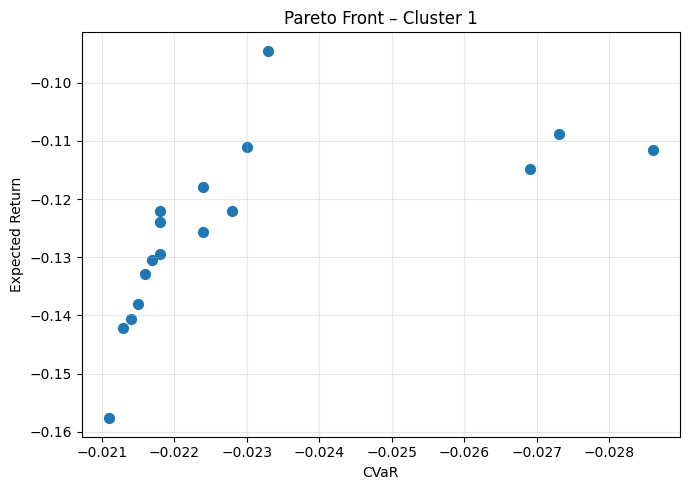

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("hasil cluster 1.csv", delimiter=';', decimal=',')

# Plot
plt.figure(figsize=(7,5))
plt.scatter(df["CVaR"], df["Return Portofolio"], s=50)

plt.xlabel("CVaR")
plt.ylabel("Expected Return")
plt.title("Pareto Front – Cluster 1")

# Balik sumbu X: risiko besar di kiri, kecil di kanan
plt.gca().invert_xaxis()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

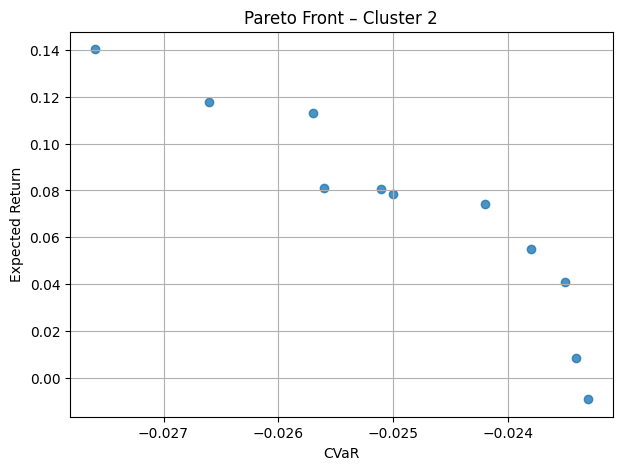

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("hasil cluster 2.csv", delimiter=';', decimal=',')

# Plot Efficient Frontier style
plt.figure(figsize=(7, 5))
plt.scatter(
    df["CVaR"],
    df["Expected Return"],
    alpha=0.8
)

plt.xlabel("CVaR")
plt.ylabel("Expected Return")
plt.title("Pareto Front – Cluster 2")
plt.grid(True)

plt.show()

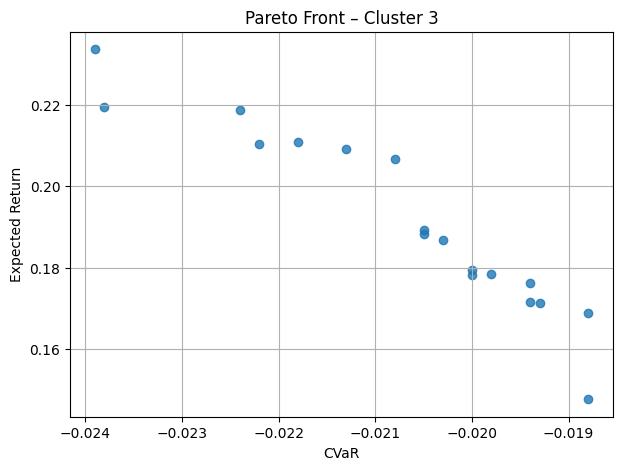

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("hasil cluster 3.csv", delimiter=';', decimal=',')

# Plot Efficient Frontier style
plt.figure(figsize=(7, 5))
plt.scatter(
    df["CVaR"],
    df["Return Portofolio"],
    alpha=0.8
)

plt.xlabel("CVaR")
plt.ylabel("Expected Return")
plt.title("Pareto Front – Cluster 3")
plt.grid(True)

plt.show()

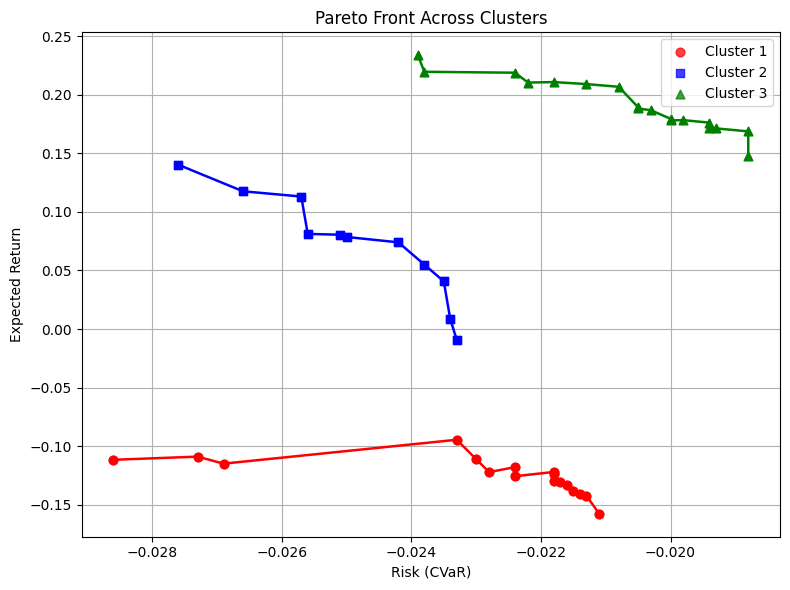

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== Daftar file CSV tiap cluster =====
clusters = {
    "Cluster 1": ("hasil cluster 1.csv", ';', ','),
    "Cluster 2": ("hasil cluster 2.csv", ';', ','),
    "Cluster 3": ("hasil cluster 3.csv", ';', ',')
}

# Style biar kebaca
styles = {
    "Cluster 1": {"color": "red",   "marker": "o"},
    "Cluster 2": {"color": "blue",  "marker": "s"},
    "Cluster 3": {"color": "green", "marker": "^"}
}

plt.figure(figsize=(8, 6))

for cluster, file in clusters.items():
    # Access the filename, delimiter, and decimal directly from the tuple
    df = pd.read_csv(file[0], delimiter=file[1], decimal=file[2])

    # OPTIONAL: pastikan urut berdasarkan CVaR
    df = df.sort_values("CVaR")

    # Scatter
    plt.scatter(
        df["CVaR"],
        df["Return Portofolio"],
        label=cluster,
        alpha=0.75,
        s=40,
        **styles[cluster]
    )

    # Garis Pareto (optional tapi bagus)
    plt.plot(
        df["CVaR"],
        df["Return Portofolio"],
        linewidth=1.8,
        **styles[cluster]
    )

plt.xlabel("Risk (CVaR)")
plt.ylabel("Expected Return")
plt.title("Pareto Front Across Clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()